regression_2.ipynb

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from scipy import optimize

In [10]:
np.random.seed(100)

In [11]:
#True data points
def make_real_y(x, true_m=1.5, true_c=5., sigma=1.):
    true_y = true_m * x + true_c
    errs = np.random.normal(loc=0., scale=sigma, size=len(x))
    return true_y + errs

m = 4
c = 10.
sigma = 2.
x = np.arange(0, 20, 1)
y = make_real_y(x, m, c, sigma)

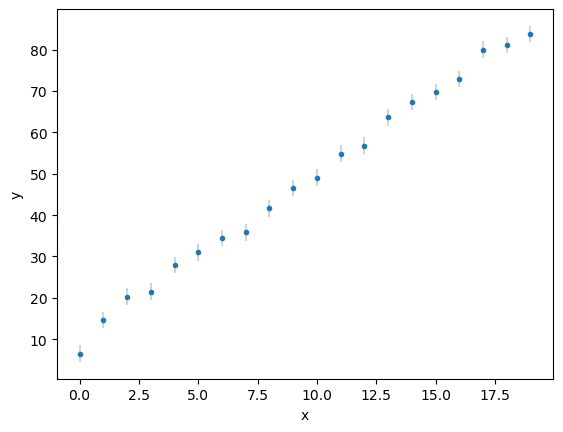

In [12]:
plt.errorbar(x, y, yerr=sigma, fmt='.', ecolor='LightGrey', label="Expected")
plt.xlabel("x")
plt.ylabel("y")
# plt.legend()
plt.show()

In [13]:
def log_likelihood(params):
    model_m, model_c = params

    y_m = model_m * x + model_c
        
    L = 0
    for y_i, y_m_i in zip(y, y_m):
        L += (-0.5 * ((y_i - y_m_i)**2 / sigma**2))
    L = L + (len(x) / 2) * np.log(2 * np.pi * sigma**2) 

    return L

def log_prior(params):
    model_m, model_c = params

    P = 0.
    if model_m > 30:
        P += -np.inf 

    return P

def log_prob(params):
    return -(log_likelihood(params) + log_prior(params))

In [14]:
guess = [1, 6]
likelihood_model = optimize.minimize(log_prob, guess)#, method='Nelder-Mead'
print(likelihood_model)

y_m = likelihood_model['x'][0] * x + likelihood_model['x'][1]
residual = y - y_m

      fun: -26.38371848010639
 hess_inv: array([[ 0.00601726, -0.05713649],
       [-0.05713649,  0.74287497]])
      jac: array([4.05311584e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 3.9857074 , 10.12841904])


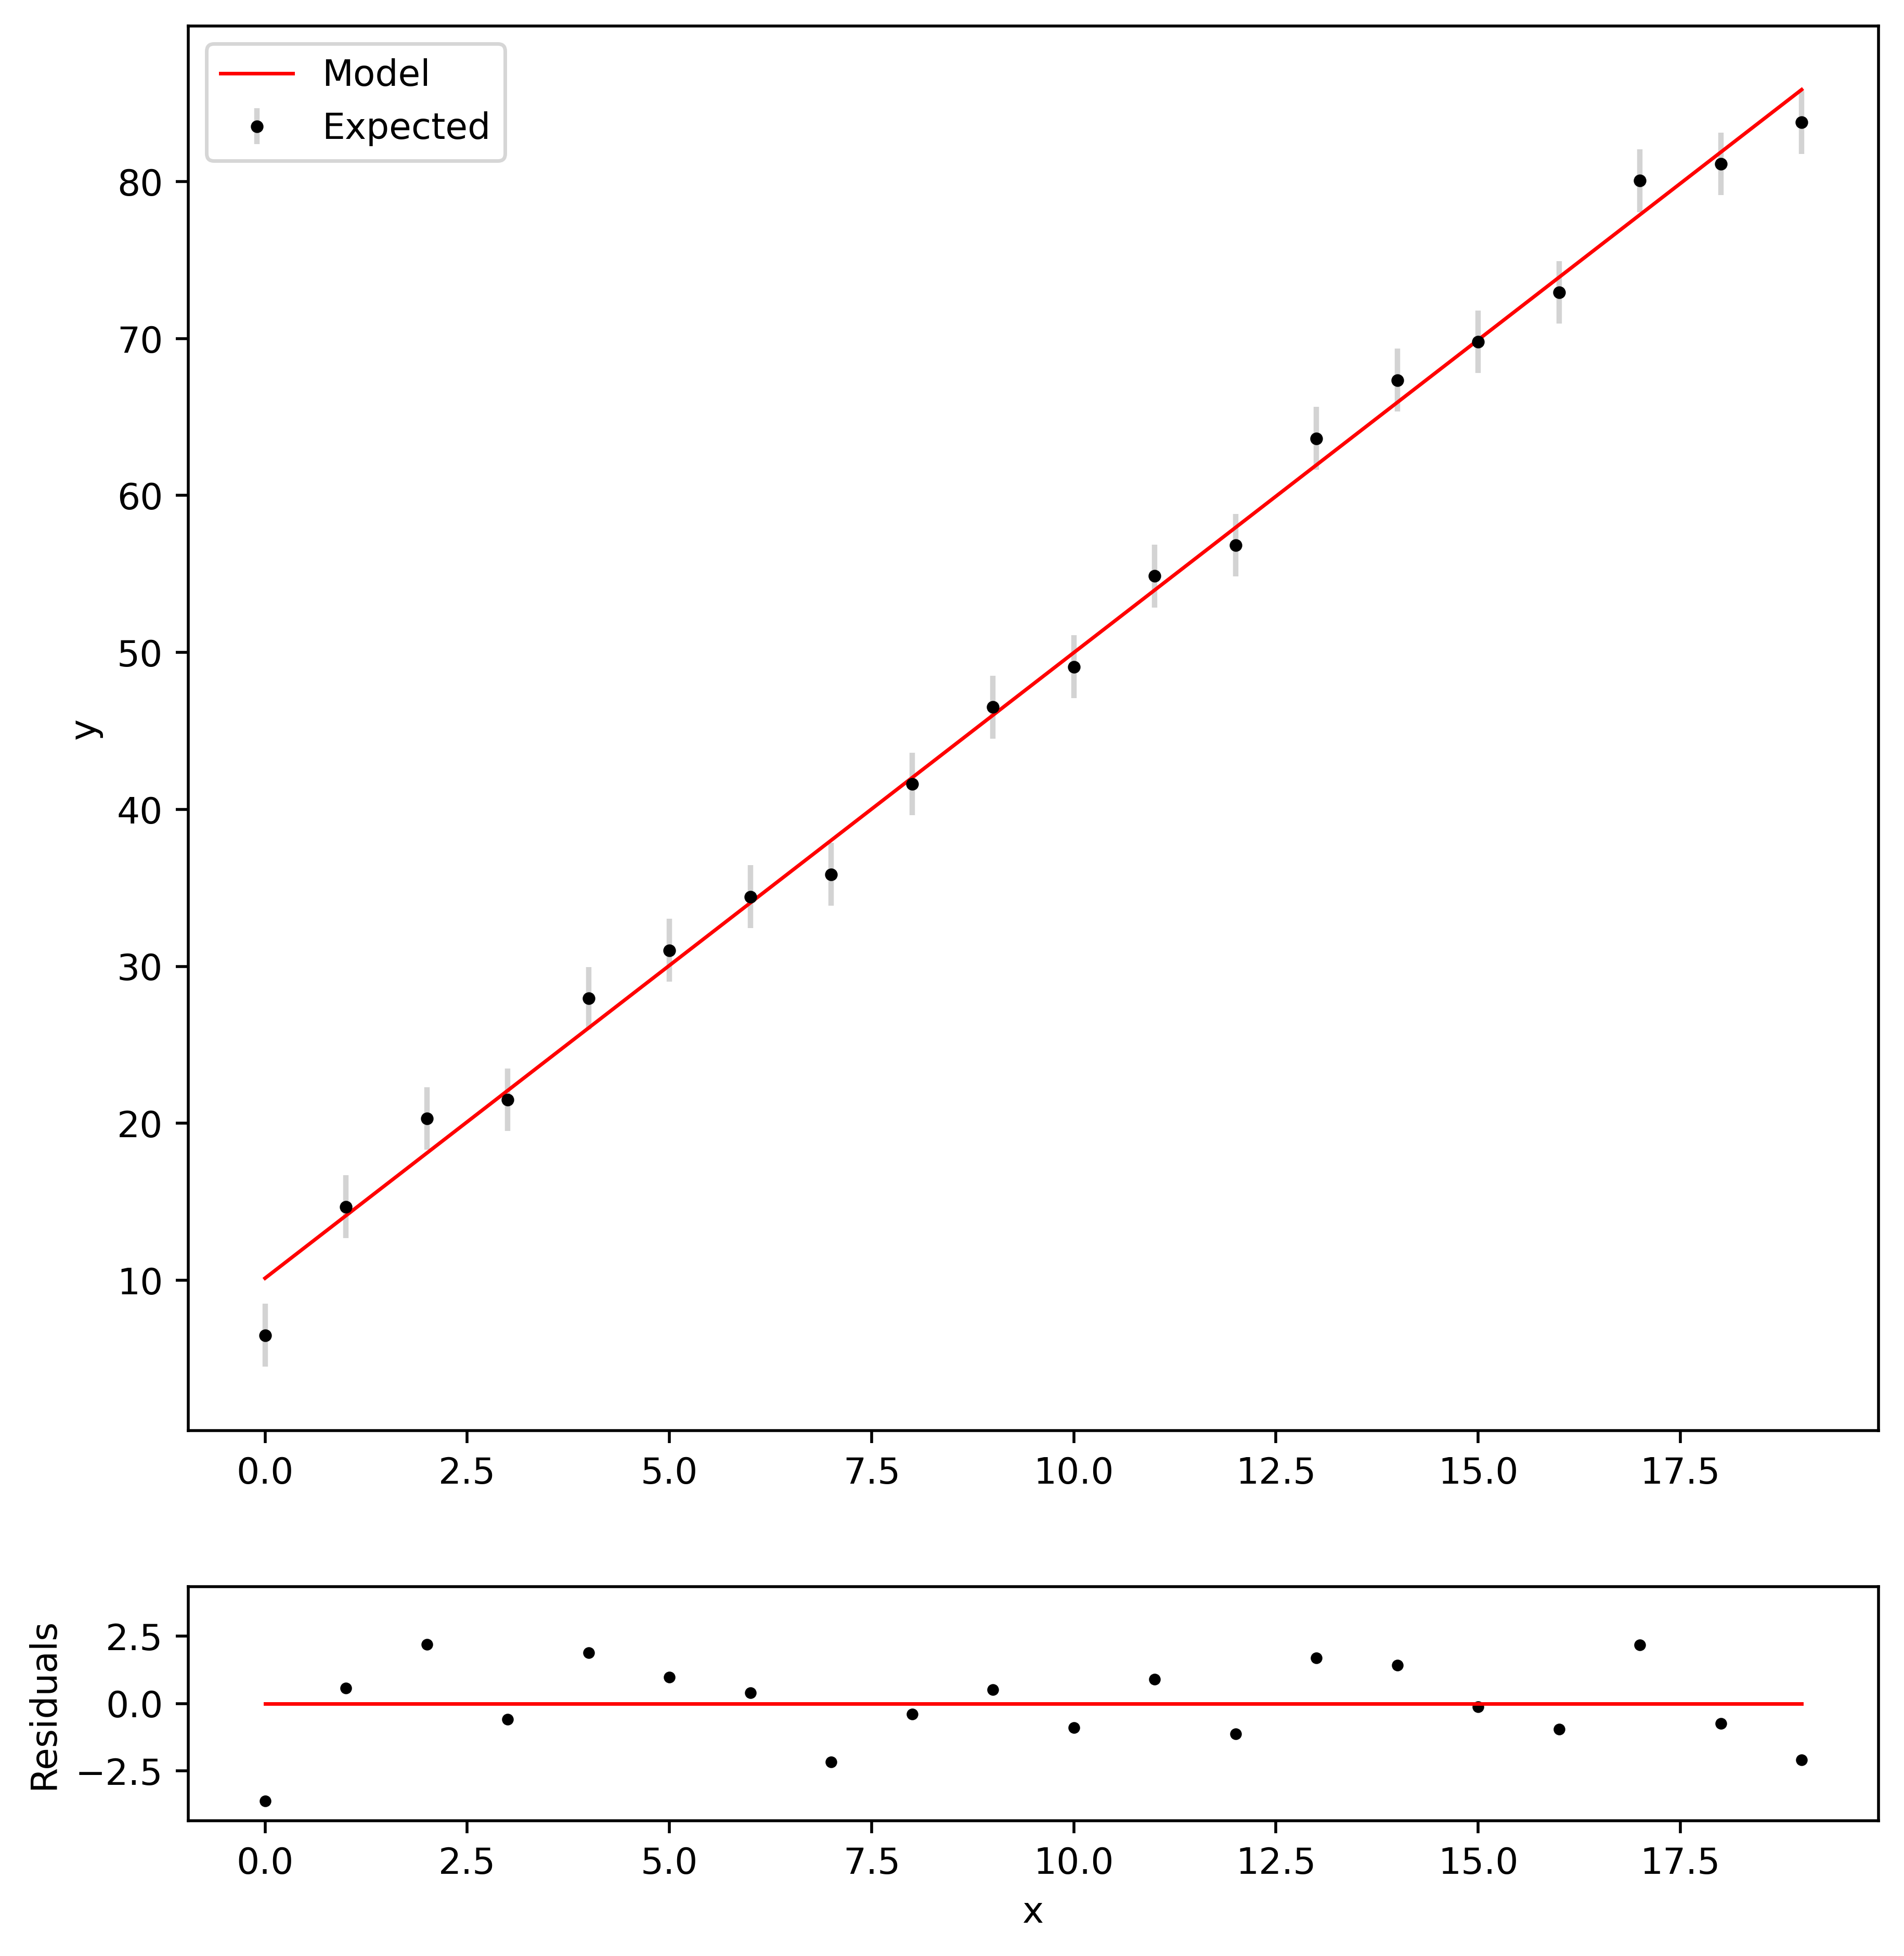

In [15]:
#Panel settings
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -1.15

rect = [left, bottom, width, height]
rect_res = [left, bottom+height+spacing, width, 0.15]

fig = plt.figure(figsize=(10, 6), dpi=500)
ax = fig.add_axes(rect)

ax_res = fig.add_axes(rect_res, sharex=ax)

#Top panel
ax.errorbar(x, y, yerr=sigma, fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Expected")
ax.plot(x, y_m, color='red',label="Model", lw=1)
ax.set(ylabel = "y")
# ax.set_xlim((min(x), max(x)))
ax.legend()

ax.tick_params(axis='x', which='minor')
ax.tick_params(axis='y', which='minor')

#Bottom panel
ax_res.scatter(x, residual, color='black', s=5)
ax_res.set_ylim((-max(abs(residual))*1.2, max(abs(residual)*1.2)))
ax_res.plot([min(x), max(x)], [0, 0], color='red', lw=1)
ax_res.set(xlabel="x", ylabel="Residuals")

ax_res.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax_res.yaxis.set_minor_locator(ticker.AutoMinorLocator())

plt.show()